0.059319999999985384
0.08738999999999919
0.05888899999999353
0.08724200000000337
0.05924799999999664
0.08676799999997797
0.0595260000000053
0.08792199999999184
0.05969699999999989
0.0878009999999847
0.05978099999998676
0.0868199999999888
0.06284700000000498
0.11137800000000198
0.06029599999999391
0.08708100000001195
 
0.06010749999999376
0.09039987499999569


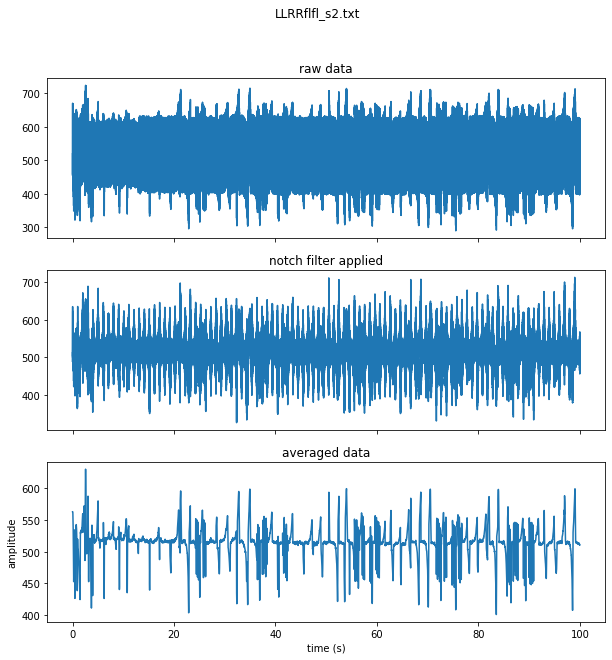

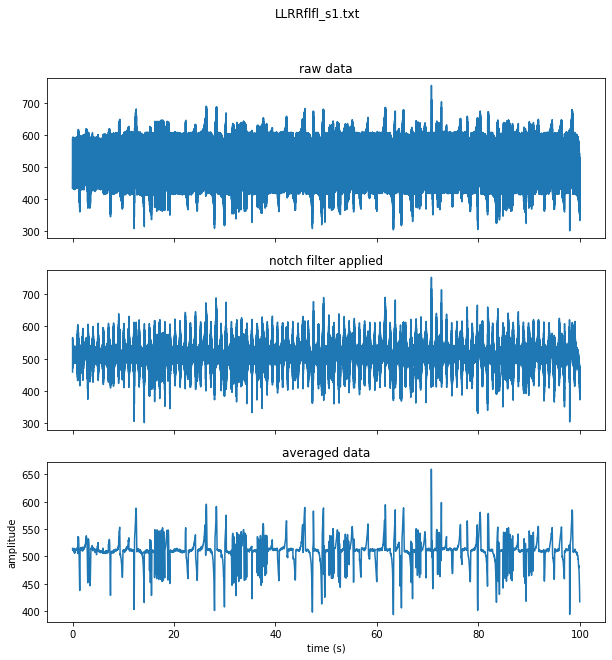

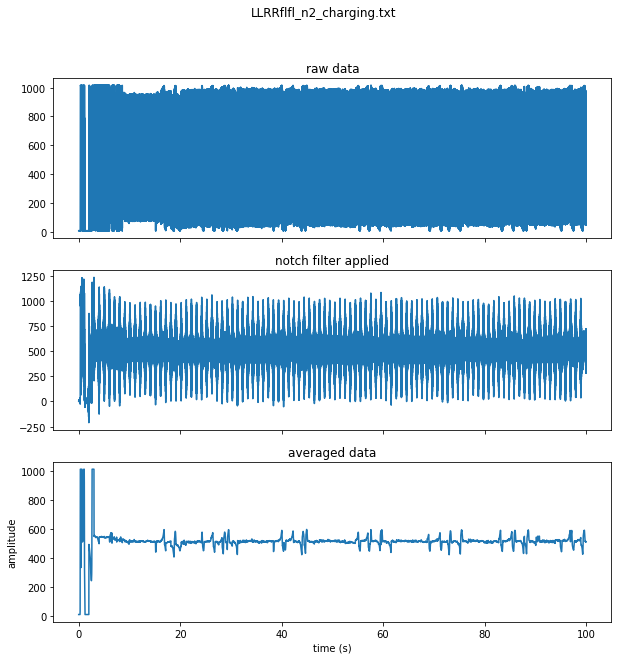

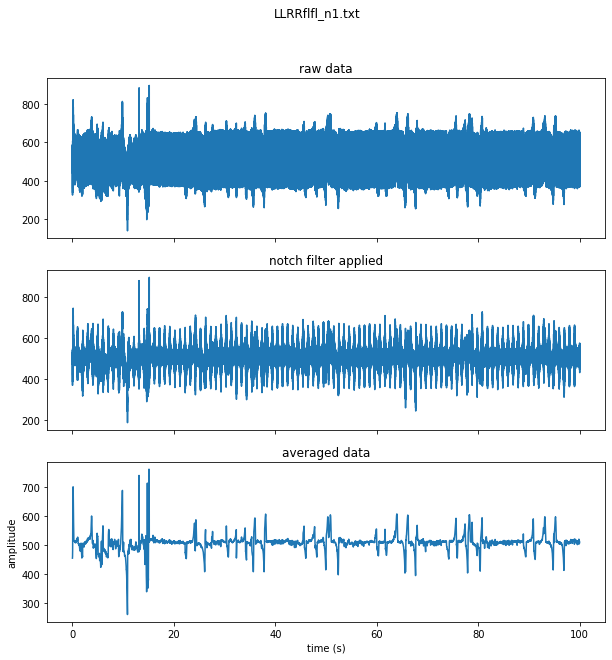

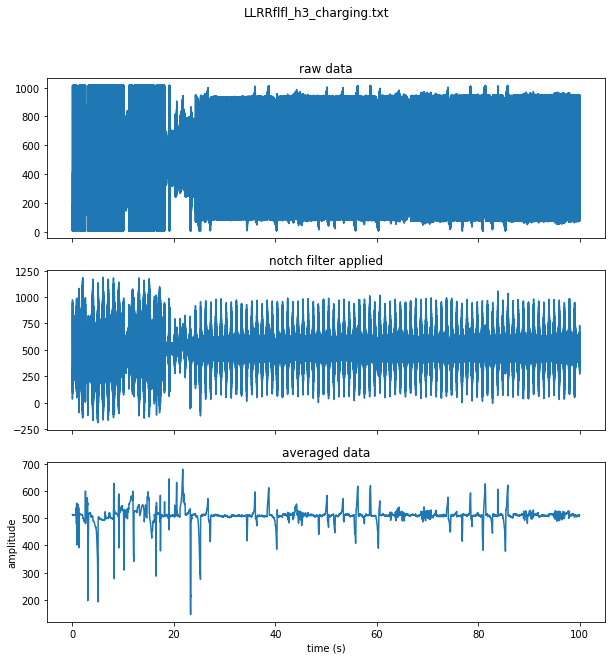

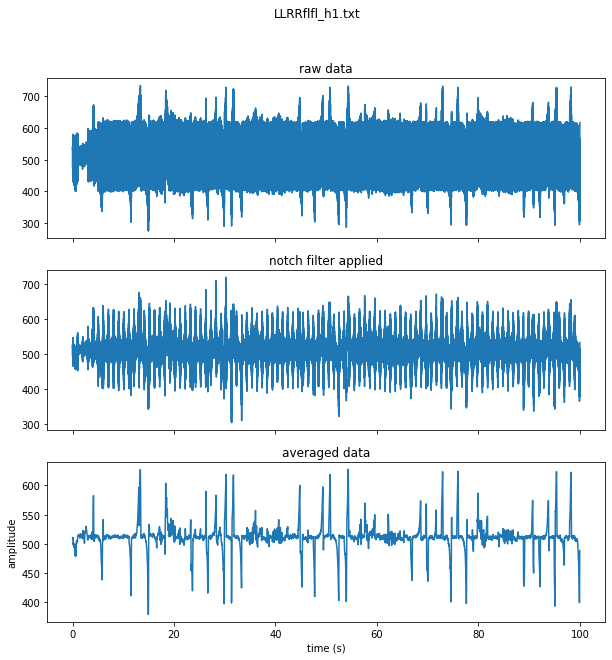

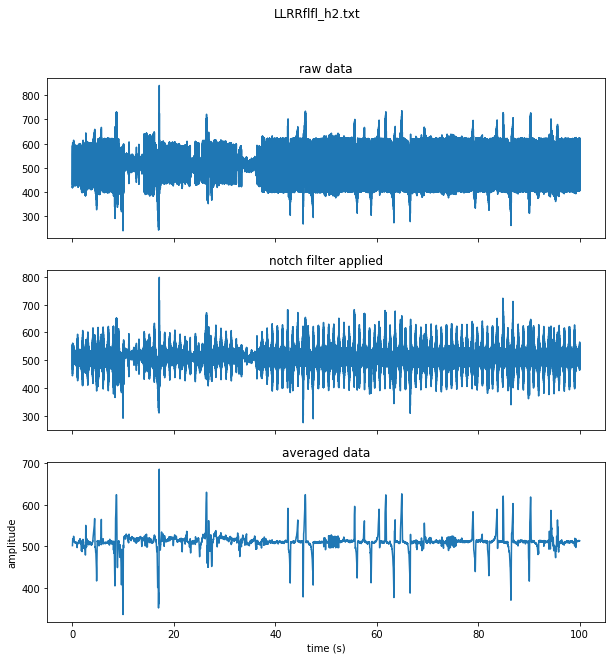

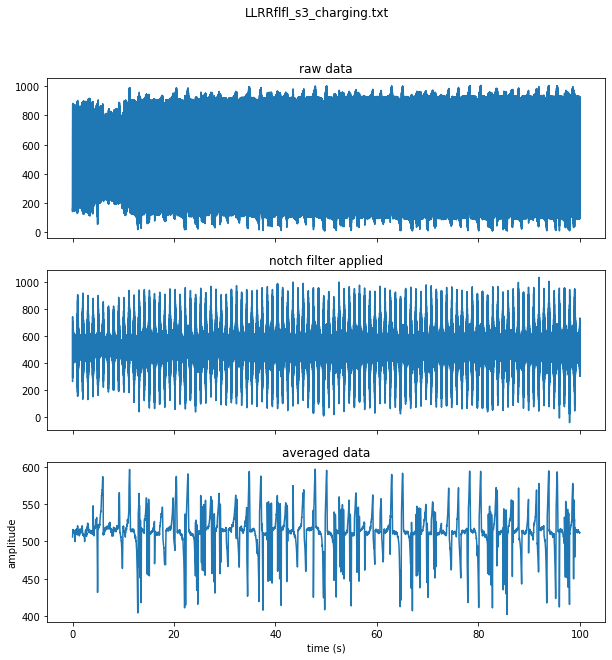

In [21]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import os
import time

# Changing directory
dir = '/Users/nadasalama/Documents/uni/sem 1 2021/PHYS3888/filter/Week 12'
os.chdir(dir)
filenames = os.listdir(dir)

for file in filenames:
    file = open(file, 'r') # opeing and reading each file
    f = file.readlines()
    amp_ls = []

    for line in f:
        line = line.strip('\n').split(' ')
        amp = line[0]
        amp_ls.append(float(amp))
    time_ls = np.linspace(0,100,len(amp_ls))
    amp_ls.reverse() # Data collected from Spiker Box was saved in reverse.
    
    # designing the notch filter
    fs = len(amp_ls)/100  # Sample frequency (Hz)
    f0 = 50  # Frequency to be removed from signal (Hz)
    Q = 20  # Quality factor - determines the bandwidth (Q = f0/bandwidth)
    b, a = signal.iirnotch(f0, Q, fs)
    freq, h = signal.freqz(b, a, fs=fs)

    start = time.process_time()
    y_notched = signal.filtfilt(b, a, amp_ls) # Applying the notch filter to the data
    print(time.process_time() - start)
    
    # Taking rolling average for x points
    x = 200;
    y_av = [] # Setting up an array to store the avergaed data
    time_ = [] # Setting up an array to store the new times the same length as our averaged data
    start = time.process_time()
    i = 0
    while i <len(amp_ls):
        y_av.append(np.mean(amp_ls[i:i+x]))
        time_.append(time_ls[i])
        i += x
    print(time.process_time() - start)
    
    # Plotting the data
    fig, axs = plt.subplots(3, sharex=True)
    fig.set_size_inches(10, 10)
    axs[0].plot(time_ls,amp_ls)
    axs[0].set_title('raw data')
    axs[1].plot(time_ls,y_notched)
    axs[1].set_title('notch filter applied')
    axs[2].plot(time_,y_av)
    axs[2].set_title('averaged data')
    fig.suptitle(str(file.name))
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    
    # Saving the figures
    fig.savefig('/Users/nadasalama/Documents/uni/sem 1 2021/PHYS3888/filter/fig/' + str(file.name).replace('.txt','') + '.pdf', dpi=100)